<a href="https://colab.research.google.com/github/yosshy2020/intro_git/blob/master/biginner_ans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize
from scipy.stats import skew
%matplotlib inline

train = pd.read_csv('/content/drive/MyDrive/biginners/train.csv')
test = pd.read_csv('/content/drive/MyDrive/biginners/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/biginners/sample_submit.csv')
print('train.shape:', train.shape)
print('test.df.shape:', test.shape)

train.shape: (11900, 13)
test.df.shape: (5100, 12)


In [3]:
train

,index,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,native-country,Y
0,322,21,Private,132652,Some-college,10,Divorced,Adm-clerical,Own-child,White,Female,United-States,0
1,11968,29,Private,132652,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,United-States,0
2,10868,19,Private,132652,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,United-States,0
3,3394,17,Private,132652,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,United-States,0
4,15993,47,Private,132652,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11895,9225,23,Private,132652,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,United-States,0
11896,13123,31,Private,132652,HS-grad,9,Divorced,Other-service,Unmarried,Black,Female,United-States,0
11897,9845,21,Private,132652,HS-grad,9,Never-married,Other-service,Own-child,White,Male,United-States,0
11898,10799,29,Private,132652,Bachelors,13,Never-married,Machine-op-inspct,Not-in-family,White,Male,United-States,0


In [4]:
test

,index,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,native-country
0,3873,17,Local-gov,132652,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
1,3625,23,Private,132652,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,United-States
2,3028,19,Private,132652,11th,7,Never-married,Handlers-cleaners,Own-child,White,Female,United-States
3,13814,30,State-gov,132652,HS-grad,9,Never-married,Protective-serv,Unmarried,Black,Female,United-States
4,15398,60,Private,132652,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...
5095,6726,19,Private,132652,Some-college,10,Never-married,Exec-managerial,Unmarried,White,Female,United-States
5096,1501,23,Private,132652,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,United-States
5097,6391,36,Private,132652,9th,5,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
5098,7104,33,Private,132652,Prof-school,11,Never-married,Prof-specialty,Not-in-family,White,Male,United-States


In [5]:
submission

,3873,0
0,3625,0
1,3028,0
2,13814,0
3,15398,0
4,13244,0
...,...,...
5094,6726,0
5095,1501,0
5096,6391,0
5097,7104,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11900 entries, 0 to 11899
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           11900 non-null  int64 
 1   age             11900 non-null  int64 
 2   workclass       11900 non-null  object
 3   fnlwgt          11900 non-null  int64 
 4   education       11900 non-null  object
 5   education-num   11900 non-null  int64 
 6   marital-status  11900 non-null  object
 7   occupation      11900 non-null  object
 8   relationship    11900 non-null  object
 9   race            11900 non-null  object
 10  sex             11900 non-null  object
 11  native-country  11900 non-null  object
 12  Y               11900 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.2+ MB


In [7]:
all_data = pd.concat((train.loc[:,'age':'native-country'],
                      test.loc[:,'age':'native-country']))

print(all_data.shape)
print(all_data)

(17000, 11)
      age  workclass  fnlwgt  ...   race     sex native-country
0      21    Private  132652  ...  White  Female  United-States
1      29    Private  132652  ...  White  Female  United-States
2      19    Private  132652  ...  White  Female  United-States
3      17    Private  132652  ...  White    Male  United-States
4      47    Private  132652  ...  White    Male  United-States
...   ...        ...     ...  ...    ...     ...            ...
5095   19    Private  132652  ...  White  Female  United-States
5096   23    Private  132652  ...  White    Male  United-States
5097   36    Private  132652  ...  White    Male  United-States
5098   33    Private  132652  ...  White    Male  United-States
5099   36  Local-gov  132652  ...  White    Male  United-States

[17000 rows x 11 columns]


In [8]:
!pip install scikit-learn

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
all_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'native-country'],
      dtype='object')

In [11]:
categories = all_data.columns[all_data.dtypes == 'object']
categories

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [12]:
le = LabelEncoder()

for cat in categories:
  le = LabelEncoder()
  print(cat)
  if all_data[cat].dtypes == "object":
    le = le.fit(all_data[cat])
    all_data[cat] = le.transform(all_data[cat])

workclass
education
marital-status
occupation
relationship
race
sex
native-country


In [13]:
all_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,native-country
0,21,3,132652,13,10,0,1,3,2,0,2
1,29,3,132652,10,9,0,1,1,2,0,2
2,19,3,132652,9,13,2,8,1,2,0,2
3,17,3,132652,10,9,2,2,3,2,1,2
4,47,3,132652,13,10,1,2,0,2,1,2


In [14]:
train.shape[0]

11900

In [15]:
all_data[:train.shape[0]]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,native-country
0,21,3,132652,13,10,0,1,3,2,0,2
1,29,3,132652,10,9,0,1,1,2,0,2
2,19,3,132652,9,13,2,8,1,2,0,2
3,17,3,132652,10,9,2,2,3,2,1,2
4,47,3,132652,13,10,1,2,0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...
11895,23,3,132652,10,9,1,10,5,2,0,2
11896,31,3,132652,10,9,0,7,4,1,0,2
11897,21,3,132652,10,9,2,7,3,2,1,2
11898,29,3,132652,9,13,2,6,1,2,1,2


In [16]:
all_data[train.shape[0]:]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,native-country
0,17,2,132652,11,14,1,8,0,2,1,2
1,23,3,132652,13,10,1,10,0,2,1,2
2,19,3,132652,1,7,2,5,3,2,0,2
3,30,6,132652,10,9,2,9,4,1,0,2
4,60,3,132652,9,13,1,8,0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...
5095,19,3,132652,13,10,2,3,4,2,0,2
5096,23,3,132652,10,9,1,10,0,2,1,2
5097,36,3,132652,6,5,1,6,0,2,1,2
5098,33,3,132652,12,11,2,8,1,2,1,2


In [17]:
train.Y

0        0
1        0
2        0
3        0
4        0
        ..
11895    0
11896    0
11897    0
11898    0
11899    1
Name: Y, Length: 11900, dtype: int64

In [18]:
train_X = all_data[:train.shape[0]]
test_X = all_data[train.shape[0]:]
train_Y= train.Y

In [19]:
import lightgbm as lgb

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
!pip install optuna

In [23]:
import optuna

In [24]:
# X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_Y, test_size=0.2,random_state=1234,shuffle=False, stratify=None)

In [25]:
folds = 5
kf = KFold(n_splits=folds)

In [26]:
categories = ['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country']

In [27]:
# def objective(trial):
#   params = {
#     "objective":"regression",
#     "random_seed":1234,
#     "max_bin":trial.suggest_int("max_bin",50,200),
#     "num_leaves":trial.suggest_int("num_leaves", 4,64),
#     "min_data_in_leaf":trial.suggest_int("min_data_in_leaf",2,16),
#     "random_seed":1234,
#     "learning_rate":0.05,
#     "n_estimators":1000,
#     "bagging_fraction":trial.suggest_uniform("bagging_fraction",0.4,0.9),
#     "bagging_freq":trial.suggest_int("bagging_freq", 1,10),
#     "feature_fraction":trial.suggest_uniform("feature_fraction",0.4,0.9),
#     "min_sum_hessian_in_leaf":trial.suggest_int("min_sum_hessian_in_leaf",1,10),
#     }
#   lgb_train = lgb.Dataset(X_train, y_train)
#   lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

#   model_lgb = lgb.train(params, lgb_train,
#                        valid_sets=lgb_eval,
#                        num_boost_round=1000,
#                        early_stopping_rounds=50,
#                        verbose_eval=10)

#   y_pred = model_lgb.predict(X_valid, num_iiteration=model_lgb.best_iteration)
#   score = accuracy_score(y_valid, np.round(y_pred))
#   return score

In [28]:
# study = optuna.create_study(sampler=optuna.samplers.RandomSampler(seed=0))
# study.optimize(objective, n_trials=50)
# study.best_params

In [29]:
lgbm_params = {
     "objective":"regression",
     "rondom_seed":1234,
      "max_bin":71,
      "num_leaves":54,
      "min_data_in_leaf":6,
      "random_seed":1234,
      "learning_rate":0.05,
      "n_estimators":1000,
      "bagging_fraction":0.5487673032722362,
      "bagging_freq":9,
      "feature_fraction":0.8818313802505147,
      "min_sum_hessian_in_leaf":2,
      }

In [30]:
models = [ ]

for train_index, val_index in kf.split(train_X):
  X_train =train_X.iloc[train_index]
  X_valid =train_X.iloc[val_index]
  y_train =train_Y.iloc[train_index]
  y_valid =train_Y.iloc[val_index]

  lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
  lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature=categories, reference=lgb_train)

  model_lgb = lgb.train(lgbm_params,
                      lgb_train,
                      valid_sets=lgb_eval,
                      num_boost_round=1000,
                      early_stopping_rounds=50,
                      verbose_eval=10)
  
  y_pred = model_lgb.predict(X_valid, num_iiteration=model_lgb.best_iteration)
  print(accuracy_score(y_valid, np.round(y_pred)))

  models.append(model_lgb)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 50 rounds.
[10]	valid_0's l2: 0.137797
[20]	valid_0's l2: 0.119983
[30]	valid_0's l2: 0.112842
[40]	valid_0's l2: 0.109742
[50]	valid_0's l2: 0.109214
[60]	valid_0's l2: 0.109377
[70]	valid_0's l2: 0.109106
[80]	valid_0's l2: 0.108893
[90]	valid_0's l2: 0.109061
[100]	valid_0's l2: 0.109441
[110]	valid_0's l2: 0.109389
[120]	valid_0's l2: 0.109671
[130]	valid_0's l2: 0.1097
Early stopping, best iteration is:
[81]	valid_0's l2: 0.108891
0.8470588235294118
Training until validation scores don't improve for 50 rounds.
[10]	valid_0's l2: 0.145266
[20]	valid_0's l2: 0.125595
[30]	valid_0's l2: 0.117998
[40]	valid_0's l2: 0.114769
[50]	valid_0's l2: 0.113563
[60]	valid_0's l2: 0.113719
[70]	valid_0's l2: 0.114017
[80]	valid_0's l2: 0.114472
[90]	valid_0's l2: 0.115038
[100]	valid_0's l2: 0.115093
Early stopping, best iteration is:
[52]	valid_0's l2: 0.11346
0.834873949579832
Training until validation scores don't improve for 50 rounds.
[10]	

In [31]:
model_lgb.feature_importance()

array([1368,   80,   77,  142,  868,   60,  304,   68,  292,  345,    0])

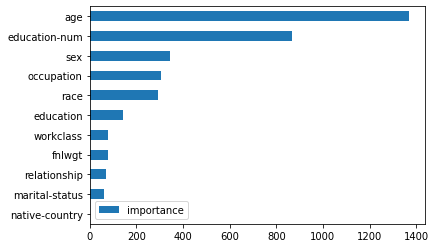

In [32]:
importance = pd.DataFrame(model_lgb.feature_importance(), 
                          index=X_train.columns, columns=["importance"]).sort_values(by="importance",ascending =True)
importance.plot.barh()

In [33]:
preds = [ ]

for model in models:
  pred = model.predict(test_X)
  preds.append(pred)

In [34]:
preds_array = np.array(preds)
preds_mean = np.mean(preds_array, axis=0)

In [35]:
preds_mean

array([0.67896141, 0.31626412, 0.01050413, ..., 0.27946219, 0.05110531,
       0.7361349 ])

In [36]:
preds_int = (preds_mean > 0.5).astype(int)

In [37]:
preds_int

array([1, 0, 0, ..., 0, 0, 1])

In [38]:
submission

,3873,0
0,3625,0
1,3028,0
2,13814,0
3,15398,0
4,13244,0
...,...,...
5094,6726,0
5095,1501,0
5096,6391,0
5097,7104,0


In [39]:
test["index"]

0        3873
1        3625
2        3028
3       13814
4       15398
        ...  
5095     6726
5096     1501
5097     6391
5098     7104
5099     4214
Name: index, Length: 5100, dtype: int64

In [40]:
soution=pd.DataFrame(preds_int, columns = ["submission"])

In [41]:
solution = pd.DataFrame({"index":test["index"], "Y":preds_int})

In [42]:
solution["Y"].value_counts()

0    3919
1    1181
Name: Y, dtype: int64

In [43]:
# solution.to_csv('./submit2.csv', index=False,header=False)

In [44]:
solution

,index,Y
0,3873,1
1,3625,0
2,3028,0
3,13814,0
4,15398,1
...,...,...
5095,6726,0
5096,1501,0
5097,6391,0
5098,7104,0


In [45]:
import xgboost as xgb

In [46]:
categories

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [47]:
for col in categories:
  train_X[col] = train_X[col].astype("int8")
  test_X[col]  = test_X[col].astype("int8")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
xgb_params = {
    "learning_rate":0.05,
    "seed":1234,
    "max_depth":7,
    "colsample_bytree":0.6244752498895471,
    "sublsample":0.21343523881653348,
    }

In [49]:
models_xgb = [ ]
rmses_xgb = [ ]
oof_xgb = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
  X_train = train_X.iloc[train_index]
  X_valid = train_X.iloc[val_index]
  y_train = train_Y.iloc[train_index]
  y_valid = train_Y.iloc[val_index]

  xgb_train = xgb.DMatrix(X_train, label=y_train)
  xgb_eval = xgb.DMatrix(X_valid, label=y_valid)
  evals = [(xgb_train, "train"), (xgb_eval, "eval")]

  model_xgb = xgb.train(xgb_params,
                        xgb_train,
                        evals=evals,
                        num_boost_round=1000,
                        early_stopping_rounds=50,
                        verbose_eval=20,)

  y_pred = model_xgb.predict(xgb_eval)
  print(accuracy_score(y_valid, np.round(y_pred)))

  models_xgb.append(model_xgb)
  oof_xgb[val_index] = y_pred


[0]	train-rmse:0.487204	eval-rmse:0.487365
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 50 rounds.
[20]	train-rmse:0.35562	eval-rmse:0.36114
[40]	train-rmse:0.32472	eval-rmse:0.336033
[60]	train-rmse:0.314922	eval-rmse:0.330867
[80]	train-rmse:0.309387	eval-rmse:0.330231
[100]	train-rmse:0.305803	eval-rmse:0.330232
[120]	train-rmse:0.303232	eval-rmse:0.330377
[140]	train-rmse:0.301243	eval-rmse:0.330465
Stopping. Best iteration:
[91]	train-rmse:0.307187	eval-rmse:0.330152

0.8466386554621849
[0]	train-rmse:0.487069	eval-rmse:0.487686
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 50 rounds.
[20]	train-rmse:0.353956	eval-rmse:0.366561
[40]	train-rmse:0.322697	eval-rmse:0.343685
[60]	train-rmse:0.312845	eval-rmse:0.339718
[80]	train-rmse:0.307328	eval-rmse:0.339551
[100]	train-rmse:0.304069	eval-rmse:0.340036
[120]	tra

In [50]:
models_xgb

In [51]:
xgb_test = xgb.DMatrix(test_X)

In [52]:
xgb_test

In [53]:
preds_xgb = [ ]
for model in models_xgb:
  pred = model.predict(xgb_test)
  preds_xgb.append(pred)

In [54]:
preds_array_xgb = np.array(preds_xgb)
preds_mean_xgb = np.mean(preds_array_xgb, axis=0)

In [55]:
preds_mean_xgb

array([ 0.7191309 ,  0.34906632, -0.00553032, ...,  0.30858457,
        0.07022072,  0.7023892 ], dtype=float32)

In [56]:
preds_ans = preds_mean * 0.5 + preds_mean_xgb * 0.5

In [57]:
preds_ans

array([0.69904614, 0.33266522, 0.00248691, ..., 0.29402338, 0.06066301,
       0.71926204])

In [58]:
preds_a = (preds_ans > 0.5).astype(int)

In [59]:
preds_a

array([1, 0, 0, ..., 0, 0, 1])

In [60]:
soution_ans=pd.DataFrame(preds_int, columns = ["submission"])

In [61]:
solution_ans = pd.DataFrame({"index":test["index"], "Y":preds_a})

In [62]:
solution_ans["Y"].value_counts()

0    3901
1    1199
Name: Y, dtype: int64

In [63]:
solution_ans.to_csv('./submit_ans.csv', index=False,header=False)

In [64]:
solution_ans

,index,Y
0,3873,1
1,3625,0
2,3028,0
3,13814,0
4,15398,1
...,...,...
5095,6726,0
5096,1501,0
5097,6391,0
5098,7104,0
